In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Problem 3

$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x}  = \alpha \frac{\partial^2u}{\partial x^2}+\beta\frac{\partial ^3 u}{\partial x^3}

$$v_j^{n+1} = \frac{1}{2}(v_{j+1}^n+v_{j-1}^n) - \frac{a\lambda}{1+ (a\lambda)^2} (v_{j+1}^n - v_{j-1}^n) + \Delta t f_j^n$$

a) Convection: 
$$\frac{\partial u}{\partial t} + 0.1 \frac{\partial u}{\partial x} = 0$$

Lax-Wendroff scheme: 
$$u_{i}^{n+1}=u_{i}^{n}-{\frac {\Delta t}{2\Delta x}}c\left[u_{i+1}^{n}-u_{i-1}^{n}\right]+{\frac {\Delta t^{2}}{2\Delta x^{2}}}c^{2}\left[u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}\right]$$

Animation saved as lax_wendroff0.gif
Animation saved as lax_wendroff1.gif


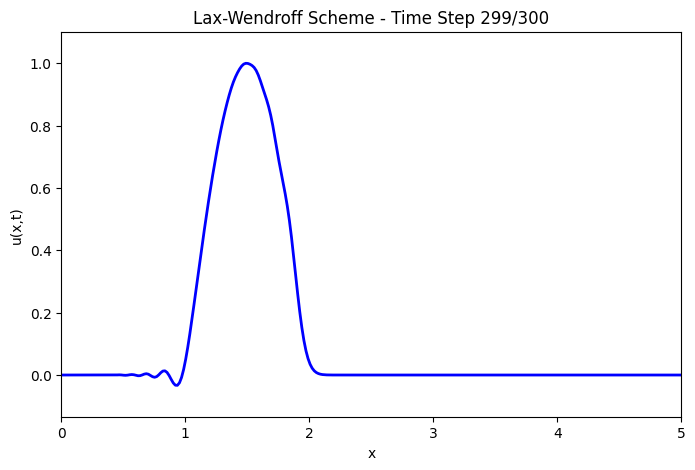

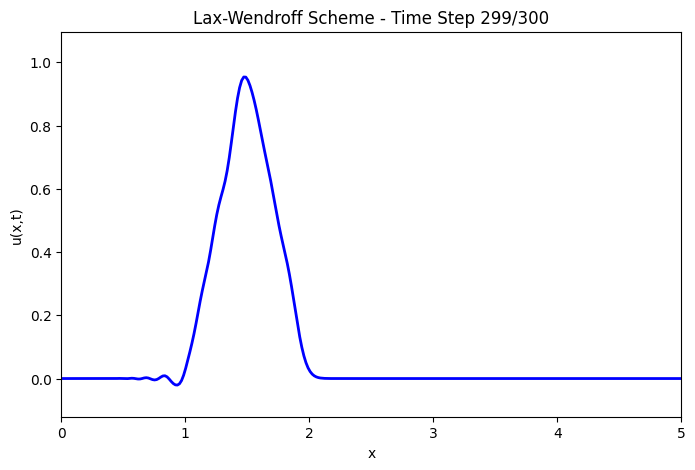

In [12]:
def rhs(x,case):
    if case == 0: 
        if x<1:
            return np.sin(np.pi*x)
        else: 
            return 0
    else:
        if x<1:
            return 1-abs(2*x-1)
        else:
            return 0
def Lax_Wendroff(N,K,c = 0.1,case = 1):
    #N - number of space points
    #K - number of time points
    u = np.zeros((N,K))
    x = np.linspace(0,5,num = N)
    t = np.linspace(0,10,num = K)
    dx = x[1]-x[0]
    dt = t[1] - t[0]
    alpha = c*dt/dx
    if alpha>1: 
         raise ValueError("Stability condition violated: c*dt/dx must be <= 1.")  
    for i in range(len(x)):
        u[i][0] = rhs(x[i],case) #boundary condtion u(x,0) = rhs
    for j in range(len(t)):
        u[0][j] = 0 #boundary condition: u(0,t) = 0
    for n in range(0,K-1):
        for i in range(1,N-1): #we don't care about i = N, since from boundary condition it's zero and we have set u = zero array inititally, so it satisfied
            u[i][n+1] = u[i][n] - 0.5*alpha*(u[i+1][n]-u[i-1][n]) + 0.5*alpha**2*(u[i+1][n]-2*u[i][n] + u[i-1][n])
    return u,x,t
# Solve the equation
N = 300
K = 300
for i in range(2):
    case = i
    u, x, t = Lax_Wendroff(N=N, K=K,case=case)
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))
    line, = ax.plot(x, u[:, 0], 'b', lw=2)  # Initial line

    ax.set_xlim(0, 5)
    ax.set_ylim(np.min(u) - 0.1, np.max(u) + 0.1)
    ax.set_xlabel("x")
    ax.set_ylabel("u(x,t)")
    ax.set_title("Lax-Wendroff Scheme - Time Evolution")

    # Update function for animation
    def update(frame):
        line.set_ydata(u[:, frame])  # Update the y-data
        ax.set_title(f"Lax-Wendroff Scheme - Time Step {frame}/{K}")
        return line,

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=K, interval=1, blit=True)

    # Save as GIF
    ani.save(f"lax_wendroff{case}.gif", writer="pillow", fps=120)

    print(f"Animation saved as lax_wendroff{case}.gif")

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} = \alpha \frac{u_{i-1}^n - 2u_i^n + u_{i+1}^n}{\Delta x^2}$$

$$u_i^{n+1} = u_i^n + \alpha \frac{\Delta t}{\Delta x^2}(u_{i-1}^n - 2u_i^n + u_{i+1}^n)$$

In [75]:
def FTCS(N,K,a=0.1/np.pi,case=0):
    #N - number of space points
    #K - number of time points
    u = np.zeros((N,K))
    x = np.linspace(0,1,num = N)
    t = np.linspace(0,2,num = K)
    dx = x[1]-x[0]
    dt = t[1] - t[0]
    alpha =2*a*dt/dx**2
    if alpha>1: 
          raise ValueError("Stability condition violated: c*dt/dx must be <= 1.")  
    for i in range(len(x)):
        u[i][0] = rhs(x[i],case)
    for j in range(len(t)):
        u[0][j] = 0
        u[-1][j] = 0
    for n in range(0,K-1):
        for i in range(1,N-1):
            u[i][n+1] = u[i][n] + alpha*(u[i-1][n]-2*u[i][n]+u[i+1][n])
    return u,x,t

Case 0: Total frames = 666, fps = 333
Animation saved as FTCS0.gif
Case 1: Total frames = 666, fps = 333
Animation saved as FTCS1.gif


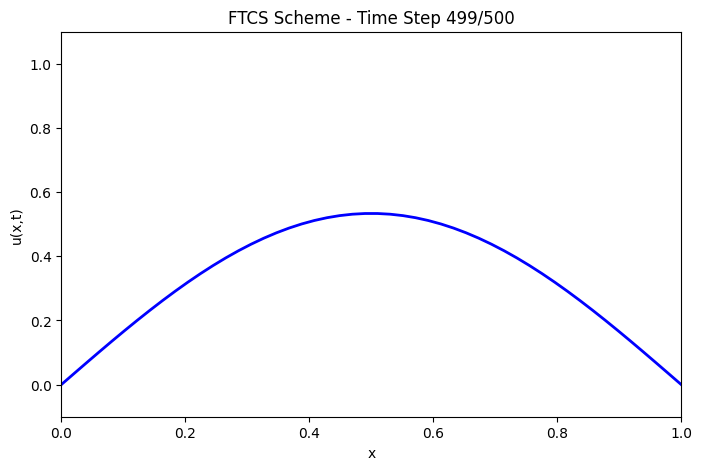

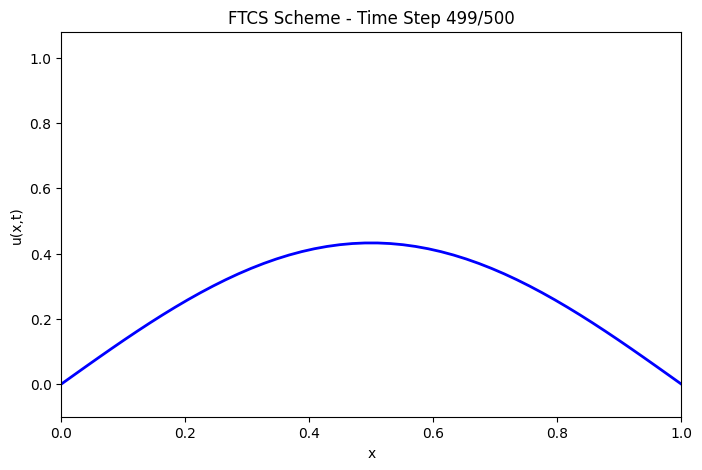

In [82]:
N = 50
K = 500  # Number of animation frames
pause_duration = 0.5  # Pause duration in seconds
total_duration = 2.0  # Total duration of the GIF in seconds

for i in range(2):
    case = i
    u, x, t = FTCS(N=N, K=K, case=case)
    
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))
    line, = ax.plot(x, u[:, 0], 'b', lw=2)  # Initial line

    ax.set_xlim(0, 1)
    ax.set_ylim(np.min(u) - 0.1, np.max(u) + 0.1)
    ax.set_xlabel("x")
    ax.set_ylabel("u(x,t)")
    ax.set_title("FTCS Scheme - Time Evolution")

    # Update function for animation
    def update(frame):
        line.set_ydata(u[:, frame])  # Update the y-data
        ax.set_title(f"FTCS Scheme - Time Step {frame}/{K}")
        return line,

    # Calculate fps
    pause_frames = int(pause_duration * K / (total_duration - pause_duration))  # Frames for pause
    total_frames = K + pause_frames  # Total frames
    #fps = int(total_frames / total_duration)  # Frames per second

    print(f"Case {case}: Total frames = {total_frames}, fps = {fps}")

    # Add a pause at the beginning
    paused_frames = [0] * pause_frames  # Duplicate the first frame to create a pause
    all_frames = paused_frames + list(range(K))  # Combine paused frames with the original frames

    # Create a new animation with the combined frames
    ani_with_pause = animation.FuncAnimation(fig, update, frames=all_frames, interval=1, blit=True)

    # Save as GIF with calculated fps
    ani_with_pause.save(f"FTCS{case}.gif", writer="pillow", fps=60)

    print(f"Animation saved as FTCS{case}.gif")

$$\frac{\partial^3u_i^n}{\partial x^3} = 
\frac{-5u_i^n + 18u_{i+1}^n - 24u_{i+2}^n + 14u_{i+3}^n - 3u_{i+4}^n}{2\Delta x^3} +O(\Delta x^2)$$

$$\frac{\partial u}{\partial t} = \beta\frac{\partial^2 u}{\partial x^2}$$
$$\frac{u_i^{n+1}- u_i^n}{\Delta t} = \frac{\beta}{2}\left(\frac{\partial^3u^{n+1}_i}{\partial x^3} + \frac{\partial^3u^n_i}{\partial x^3}\right)$$


$$\frac{u_i^{n+1}- u_i^n}{\Delta t} =\frac{\beta}{2}\left(\frac{-5u_i^{n+1} + 18u_{i+1}^{n+1} - 24u_{i+2}^{n+1} + 14u_{i+3}^{n+1} - 3u_{i+4}^{n+1}}{2\Delta x^3} + \frac{-5u_i^n + 18u_{i+1}^n - 24u_{i+2}^n + 14u_{i+3}^n - 3u_{i+4}^n}{2\Delta x^3} \right)$$

$$u^{n+1}_i - u_i^n = \frac{\beta \Delta t}{4\Delta x^3}\left(-5u_i^{n+1} + 18u_{i+1}^{n+1} - 24u_{i+2}^{n+1} + 14u_{i+3}^{n+1} - 3u_{i+4}^{n+1} -5u_i^n + 18u_{i+1}^n - 24u_{i+2}^n + 14u_{i+3}^n - 3u_{i+4}^n \right)

\begin{equation*}
\begin{gathered}
u_i^{n+1}(1+\frac{5\beta \Delta t}{4\Delta x^3}) + u_{i+1}^{n+1}(\frac{-9\beta\Delta t}{2\Delta x^3}) + u_{i+2}^{n+1}(\frac{6\beta \Delta t}{\Delta x^3}) + u_{i+3}^{n+1}(\frac{-7\beta\Delta t}{2\Delta x^3}) + u_{i+4}^{n+1}(\frac{3\beta\Delta t}{4\Delta x^3}) = 
\\ =
u_i^{n}(1-\frac{5\beta \Delta t}{4\Delta x^3}) + u_{i+1}^{n}(\frac{9\beta\Delta t}{2\Delta x^3}) + u_{i+2}^{n}(-\frac{6\beta \Delta t}{\Delta x^3}) + u_{i+3}^{n}(\frac{7\beta\Delta t}{2\Delta x^3}) + u_{i+4}^{n}(\frac{-3\beta\Delta t}{4\Delta x^3}) 
\end{gathered}
\end{equation*}

## Different approach

$$f_i^{(3)} = \frac{f_{i-1}-3f_i+3f_{i+1} - f_{i+2}}{2h^3} + O(h)$$

$$\frac{u_i^{n+1}- u_i^n}{\Delta t} =\frac{\beta}{2}\left(\frac{u_{i-1}^{n+1} -3u_{i}^{n+1} - 3u_{i+1}^{n+1} -u_{i+2}^{n+1}}{2\Delta x^3} + \frac{u_{i-1}^{n} -3u_{i}^{n} - 3u_{i+1}^{n} -u_{i+2}^{n}}{2\Delta x^3} \right)$$

 \begin{equation*}
 \begin{gathered}
  u_{i-1}^{n+1}(\frac{-\beta}{4\Delta x^3})+ u_i^{n+1}(1 + \frac{3\beta\Delta}{4\Delta x^3}) + u_{i+1}^{n+1}(\frac{3\beta}{4\Delta x^3}) + u_{i+2}^{n+1}\frac{\beta}{4\Delta x^3} = 
  \\ = 
  u_{i-1}^n\frac{\beta}{4\Delta x^3} + u_i^n(1-\frac{3\beta}{4\Delta x^3}) + u_{i+1}
^n\frac{-3\beta}{4\Delta x^3} + u_{i+2}^n\frac{-\beta}{4\Delta x^3}
 \end{gathered}
 \end{equation*}


In [111]:
def CN(N,K, b,case = 1):
    u = np.zeros((N,K))
    x = np.linspace(0,10,num = N)
    t = np.linspace(0,1,num = K)
    dx = x[1]-x[0]
    dt = t[1] - t[0]
    alpha =b*dt/(4*dx**3)
    # if alpha>1: 
    #       raise ValueError("Stability condition violated: c*dt/dx must be <= 1.")  
    for i in range(len(x)):
        u[i][0] = rhs(x[i],case)
    A = np.zeros((N, N))
    b = np.zeros(N)
    for n in range(0,K-1):
        for i in range(1,N-2):
            A[i][i-1] = -alpha
            A[i][i] = 1+3*alpha
            A[i][i+1] = 3*alpha
            A[i][i+2] = alpha
            b[i] = u[i-1][n]*alpha + u[i][n]*(1-3*alpha) + u[i+1][n]*(-3*alpha) - u[i+2][n]*alpha
        A[0][0] = 1
        A[-2][-2] = 1
        A[-1][-1] = 1
        #print(A)
        sol = np.linalg.solve(A,b)
        #print(np.shape(sol))
        #print(sol)
        u[:,n+1] = sol.flatten()
    return u,x,t


In [108]:
# def CN(N,K, b,case = 1):
#     u = np.zeros((N,K))
#     x = np.linspace(0,40,num = N)
#     t = np.linspace(0,20,num = K)
#     dx = x[1]-x[0]
#     dt = t[1] - t[0]
#     alpha =b*dt/(4*dx**3)
#     # if alpha>1: 
#     #       raise ValueError("Stability condition violated: c*dt/dx must be <= 1.")  
#     for i in range(len(x)):
#         u[i][0] = rhs(x[i],case)
#     A = np.zeros((N, N))
#     b = np.zeros(N)
#     for n in range(0,K-1):
#         for i in range(1,N-4):
#             A[i][i] = 1+5*alpha
#             A[i][i+1] = -18*alpha
#             A[i][i+2] = 24*alpha
#             A[i][i+3] = -14*alpha
#             A[i][i+4] = 3*alpha
#             b[i] = u[i][n]*(1-5*alpha) + u[i+1][n]*18*alpha + u[i+2][n]*(-24*alpha) + u[i+3][n]*14*alpha -u[i+4][n]*3*alpha
#         A[0][0] = 1
#         A[-4][-4] = 1
#         A[-3][-3] = 1
#         A[-2][-2] = 1
#         A[-1][-1] = 1
#         #print(A)
#         sol = np.linalg.solve(A,b)
#         #print(np.shape(sol))
#         #print(sol)
#         u[:,n+1] = sol.flatten()
#     return u,x,t


Animation saved as CN0.gif
Animation saved as CN1.gif


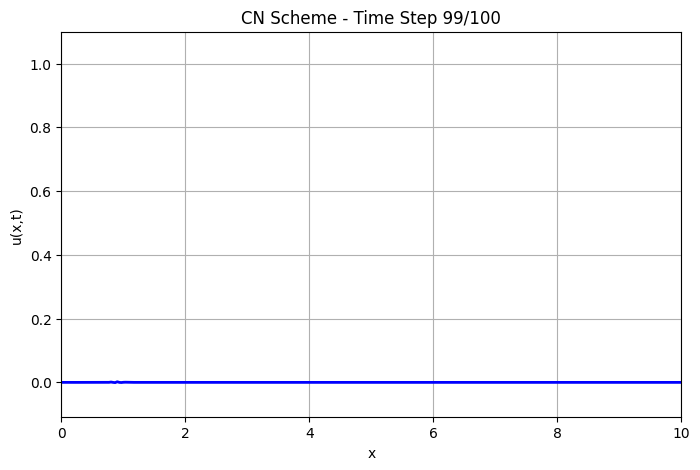

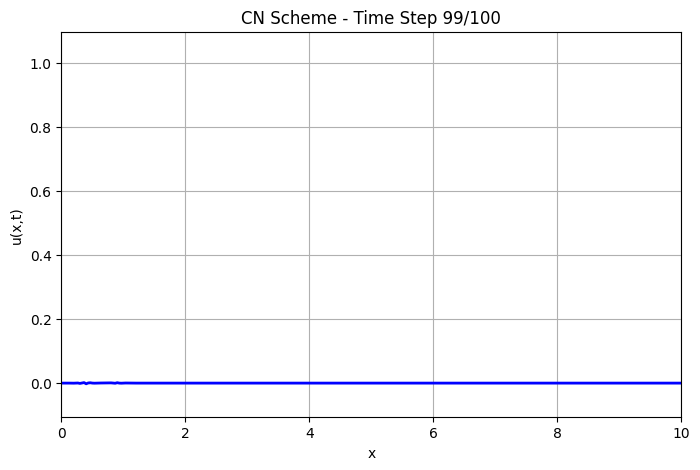

In [ ]:

N = 300
K = 100  # Number of animation frames

for i in range(2):
    case = i
    u, x, t = CN(N=N, K=K, b=.001/np.pi**2, case=case)
    
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))
    line, = ax.plot(x, u[:, 0], 'b', lw=2)  # Initial line

    ax.set_xlim(0, 10)
    ax.set_ylim(np.min(u) - 0.1, np.max(u) + 0.1)
    ax.set_xlabel("x")
    ax.set_ylabel("u(x,t)")
    ax.set_title("CN Scheme - Time Evolution")
    ax.grid(True)

    # Update function for animation
    def update(frame):
        line.set_ydata(u[:, frame])  # Update the y-data
        ax.set_title(f"CN Scheme - Time Step {frame}/{K}")
        return line,

    # Create a new animation with every 10th frame
    ani_with_pause = animation.FuncAnimation(fig, update, frames=range(0, K, 1), interval=10, blit=True)

    # Save as GIF with calculated fps
    ani_with_pause.save(f"CN{case}.gif", writer="pillow", fps=60)

    print(f"Animation saved as CN{case}.gif")

In [1]:
import sympy as sym
def finite_difference(derivative_order, accuracy_order, method = 'fw'):
    h = sym.Symbol('h')
    D = sym.Symbol('D')
    N = derivative_order + accuracy_order
    rhs_exp = []
    rhs_coeffs = []
    values = []
    rhs = 0
    if method == 'fw':
        name = 'Forward Difference'
        for i in range(N):
            rhs_exp.append(sym.series(sym.exp(i*h),h,n = N).removeO())
            rhs_coeffs.append(sym.Symbol('a_'+str(i)))
            values.append(sym.Symbol('f_'+str(i)))
            rhs += rhs_coeffs[i]*rhs_exp[i]
    elif method == 'bw':
        name = 'Backward Difference'
        for i in range(N):
            rhs_exp.append(sym.series(sym.exp(-i*h),h,n = N).removeO())
            rhs_coeffs.append(sym.Symbol('a_'+str(-i)))
            values.append(sym.Symbol('f_'+str(-i)))
            rhs += rhs_coeffs[i]*rhs_exp[i]
    elif method == 'central':
        name = 'Central Difference'
        for i in range(-int(N/2), int(N/2)):
            rhs_exp.append(sym.series(sym.exp(i*h),h,n = N).removeO())
            rhs_coeffs.append(sym.Symbol('a_'+str(i)))
            values.append(sym.Symbol('f_'+str(i)))
            rhs += rhs_coeffs[-1]*rhs_exp[-1]
    poly = sym.Poly(rhs,h)
    eqs = poly.all_coeffs()
    poly = sym.Poly(rhs,h)
    eqs = poly.all_coeffs()
    eqs[-(derivative_order+1)] -= 1
    print('System of equations: ')
    for eq in eqs: 
        sym.pprint(eq)
    coeffs = sym.solve(eqs,rhs_coeffs,dict = True)[0]
    #print(coeffs)
    rhs_final=0
    for val,coef in zip(values,rhs_coeffs):
        rhs_final += val*coeffs[coef]
    print(name+f' Finite Differenfce for {derivative_order} derivative of {accuracy_order} order:')
    sym.pprint(sym.simplify(rhs_final/(h**derivative_order)))

In [6]:
finite_difference(3,2,'fw')

System of equations: 
a₁   2⋅a₂   27⋅a₃   32⋅a₄
── + ──── + ───── + ─────
24    3       8       3  
a₁   4⋅a₂   9⋅a₃   32⋅a₄    
── + ──── + ──── + ───── - 1
6     3      2       3      
a₁          9⋅a₃       
── + 2⋅a₂ + ──── + 8⋅a₄
2            2         
a₁ + 2⋅a₂ + 3⋅a₃ + 4⋅a₄
a₀ + a₁ + a₂ + a₃ + a₄
Forward Difference Finite Differenfce for 3 derivative of 2 order:
-5⋅f₀ + 18⋅f₁ - 24⋅f₂ + 14⋅f₃ - 3⋅f₄
────────────────────────────────────
                   3                
                2⋅h                 
